# Data Preparation and EDA for IoT23 dataset

In [7]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import time as timer

In [8]:
#import data
data= pd.read_csv('iot23_combined_new_3M.csv', low_memory=False)

In [9]:
data.head()  

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed_label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,...,-,-,0.0,S,2.0,80.0,0.0,0.0,POHScan,NaN


In [10]:
#remove unncessary column
del data['Unnamed: 0']

In [11]:
data.tail()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed_label
2803565,1.562165e+09,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,udp,dhcp,90.034713,3300.0,...,-,-,0.0,D,11.0,3608.0,0.0,0.0,Benign,NaN
2803566,1.562165e+09,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,icmp,-,90.39997,340.0,...,-,-,0.0,-,9.0,844.0,0.0,0.0,Benign,NaN
2803567,1.562165e+09,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,icmp,-,89.82403000000001,72.0,...,-,-,0.0,-,3.0,216.0,0.0,0.0,Benign,NaN
2803568,1.562165e+09,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,icmp,-,45.215915,200.0,...,-,-,0.0,-,8.0,648.0,0.0,0.0,Benign,NaN
2803569,1.562165e+09,CjD5ve2qwxfFtvd4zl,fe80::5bcc:698e:39d5:cdf,133.0,ff02::2,134.0,icmp,-,44.242222999999996,0.0,...,-,-,0.0,-,2.0,96.0,0.0,0.0,Benign,NaN


In [12]:
data.shape

(2803570, 22)

# Cleaning Process start! 

In [13]:
df= data.drop(columns=['detailed_label','uid','id.orig_h','id.resp_h','service','history'])

In [14]:
#we drop these values becuase these are unncessary and some of them are completely emply.

In [15]:
df.head()

,ts,id.orig_p,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,17576.0,8081.0,tcp,3e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHScan
1,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHScan
2,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHScan
3,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHScan
4,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0,POHScan


separte the dependent and independent variables

In [16]:
y=df['label']

In [17]:
y.value_counts()

POHScan          1324265
Okiru             549228
Benign            472319
DDoS              448703
C&C                 8240
C&C-HeartBeat        782
C&C-Torii             30
Okiru-Attack           3
Name: label, dtype: int64

In [18]:
#let us drop some labels which are very rare..

In [19]:
X=df

Removing some attack lables as they are very rare .. hence it is better to remove these attacks 

In [20]:
X.drop(X[X['label'] == 'C&C-HeartBeat' ].index, inplace = True)

In [21]:
X.drop(X[X['label'] == 'C&C-Torii' ].index, inplace = True)

In [22]:
X.drop(X[X['label'] == 'Okiru-Attack' ].index, inplace = True)

Separating dependent and independent variables

In [23]:
X_=X.iloc[:,:-1]

In [24]:
X_.head()

,ts,id.orig_p,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1.536227e+09,17576.0,8081.0,tcp,3e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0
1,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0
2,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0
3,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0
4,1.536227e+09,17576.0,8081.0,tcp,2e-06,0,0,S0,-,-,0.0,2.0,80.0,0.0,0.0


In [25]:
y=X['label']

In [26]:
y.head()

0    POHScan
1    POHScan
2    POHScan
3    POHScan
4    POHScan
Name: label, dtype: object

In [27]:
y.value_counts()

POHScan    1324265
Okiru       549228
Benign      472319
DDoS        448703
C&C           8240
Name: label, dtype: int64

In [28]:
#ok so we dropped some labels...

In [29]:
X_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802755 entries, 0 to 2803569
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts             float64
 1   id.orig_p      float64
 2   id.resp_p      float64
 3   proto          object 
 4   duration       object 
 5   orig_bytes     object 
 6   resp_bytes     object 
 7   conn_state     object 
 8   local_orig     object 
 9   local_resp     object 
 10  missed_bytes   float64
 11  orig_pkts      float64
 12  orig_ip_bytes  float64
 13  resp_pkts      float64
 14  resp_ip_bytes  float64
dtypes: float64(8), object(7)
memory usage: 342.1+ MB


In [38]:
X=X_.replace('-',0)

In [39]:
#we need to convert some variables which are float in nature but here they look categorical

In [40]:
X['orig_bytes']=X['orig_bytes'].astype(float)

In [41]:
X['duration']=X['duration'].astype(float)

In [42]:
X['resp_bytes']=X['resp_bytes'].astype(float)

In [43]:
#separate categorical variables
cat_df =X.select_dtypes(include=['object']).copy()

In [44]:
cat_df

,proto,conn_state
0,tcp,S0
1,tcp,S0
2,tcp,S0
3,tcp,S0
4,tcp,S0
...,...,...
2803565,udp,S0
2803566,icmp,OTH
2803567,icmp,OTH
2803568,icmp,OTH


In [47]:
#cat=cat_df.replace('-','0')

In [48]:
#Le=LabelEncoder()

In [51]:
#cat_features=cat.apply(LabelEncoder().fit_transform)

In [46]:
#we encode these features using get_Dummies function of pandas ... it will create a new columns 
#but its alright becuase it wont be much
enc_feature = pd.get_dummies(cat_df, columns=['proto','conn_state'])

In [139]:
#let us how many categories each column has
cat_df.nunique()

proto          3
conn_state    13
dtype: int64

In [140]:
cat_df["proto"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [141]:
cat_df["proto"].value_counts()

tcp     2374265
udp      410704
icmp      17786
Name: proto, dtype: int64

In [92]:
#most packets are TCP protocol

Normal Packets: 448703
Scanning Attacks:  1324265
DDos Attacks:  472319
Okiru:  549228
CnC:  8240


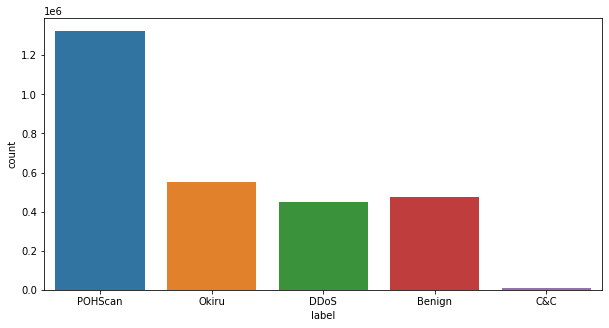

In [93]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=data, x =y)
POHScan, Okiru, DDoS, Benign, CnC =y.value_counts()
print("Normal Packets:", Benign)
print("Scanning Attacks: ", POHScan)
print("DDos Attacks: ", DDoS)
print("Okiru: ", Okiru)
print("CnC: ", CnC)
plt.show()
#fig.savefig('traffic_distribution.png')

In [94]:
#most of the packets are POHScan 

In [95]:
attacks_data =y.value_counts()

In [96]:
yn=attacks_data

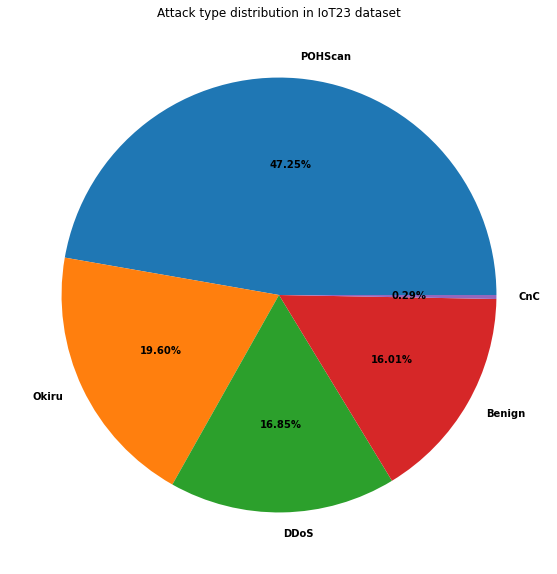

In [97]:
mlabels=['POHScan', 'Okiru', 'DDoS', 'Benign', 'CnC']
plt.figure(figsize=(10,10))
explodes=[0,0,0,0,0]
plt.pie(yn, labels = mlabels , explode=explodes, autopct='%.2f%%', textprops={'color':'k', 'fontsize':10, 'weight':'bold'})
plt.title('Attack type distribution in IoT23 dataset')
plt.savefig(r'C:\Users\DELL\Pictures\TonIoT Images\Data Preparation\iot23_attacks.tiff', bbox_inches='tight', dpi=300)
plt.show()

In [98]:
cat_df["proto"].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

TCP packets: 2375080
UDP packets:  410704
ICMP packets:  17786


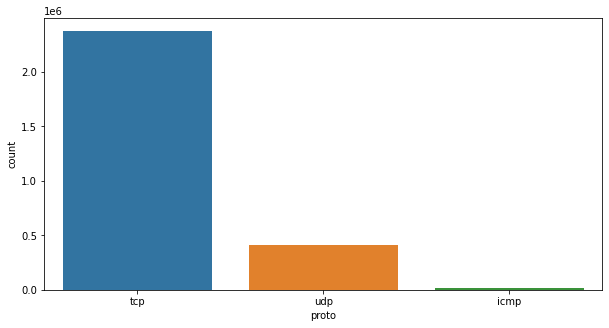

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x ="proto")
tcp, udp, icmp=data["proto"].value_counts()
print("TCP packets:", tcp)
print("UDP packets: ", udp)
print("ICMP packets: ", icmp)
plt.show()

In [100]:
cat_df["conn_state"].unique()

array(['S0', 'REJ', 'RSTO', 'SF', 'OTH', 'RSTR', 'SH', 'S1', 'S2',
       'RSTOS0', 'RSTRH', 'SHR', 'S3'], dtype=object)

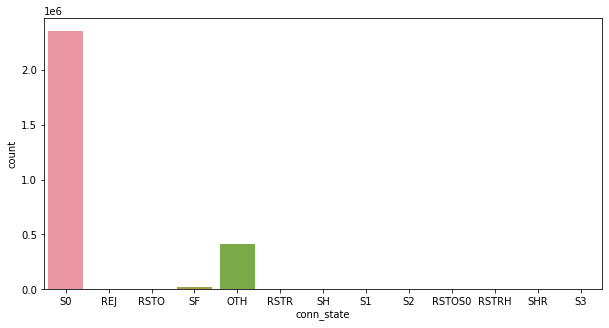

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(data=cat_df, x ="conn_state")
OTH, S0, SHR, RSTRH, SH, RSTOS0, RSTR, RSTO, SF, S1, S3, S2, REJ =data["conn_state"].value_counts()
plt.show()

In [142]:
#separating numerical variables
num_df =X.select_dtypes(exclude=['object']).copy()

In [143]:
num_df.head()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1.536227e+09,17576.0,8081.0,0.000003,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0
1,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0
2,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0
3,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0
4,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,80.0,0.0,0.0


ok so there are only three categorical variables...

In [144]:
Xe=pd.concat([num_df,enc_feature], axis=1)

In [148]:
Xe.head()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.536227e+09,17576.0,8081.0,0.000003,0.0,0.0,0,0,0.0,2.0,...,0,0,0,1,0,0,0,0,0,0
1,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,...,0,0,0,1,0,0,0,0,0,0
2,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,...,0,0,0,1,0,0,0,0,0,0
3,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,...,0,0,0,1,0,0,0,0,0,0
4,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#we combine all our data frames together to create a new preporcessed dataset. 

In [149]:
pre_processed_data=pd.concat([Xe,y], axis=1)

In [150]:
pre_processed_data.head()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,local_orig,local_resp,missed_bytes,orig_pkts,...,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,label
0,1.536227e+09,17576.0,8081.0,0.000003,0.0,0.0,0,0,0.0,2.0,...,0,0,1,0,0,0,0,0,0,POHScan
1,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,...,0,0,1,0,0,0,0,0,0,POHScan
2,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,...,0,0,1,0,0,0,0,0,0,POHScan
3,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,...,0,0,1,0,0,0,0,0,0,POHScan
4,1.536227e+09,17576.0,8081.0,0.000002,0.0,0.0,0,0,0.0,2.0,...,0,0,1,0,0,0,0,0,0,POHScan


In [151]:
pre_processed_data.shape

(2802755, 30)

In [ ]:
#let us convert our data into csv

In [152]:
pre_processed_data.to_csv('preprocessed_iot23.csv')

In [ ]:
#now our data is ready for the use..! 